In [5]:
from agent import Agent
from utils import compute_score_bounds, compute_continuity_noise
import numpy as np
import matplotlib.pyplot as plt

In [13]:
eta = np.array([6., 6.]).reshape(2, 1)
gamma = np.array([0.1, 0.05]).reshape(2, 1)
min_eigenvalue = min(gamma)
agent = Agent(eta, gamma)
beta = np.array([np.sin(np.pi/4), np.cos(np.pi/4)]).reshape(2, 1)
continuity_sigma = np.sqrt(1 / (2 * min_eigenvalue * (np.sqrt(2 * np.pi * np.e)))) + 0.001

In [38]:
discontinuity_sigma = continuity_sigma -0.4

In [35]:
bounds = compute_score_bounds(beta)
thresholds = np.linspace(bounds[0], bounds[1], 5000)

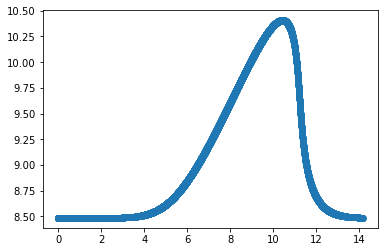

In [41]:
scores_brs_cont = [np.matmul(beta.T, agent.best_response(beta, s, continuity_sigma)).item() for s in thresholds]
plt.scatter(thresholds, scores_brs_cont)

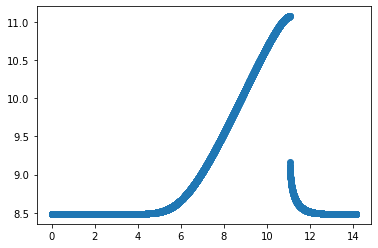

In [42]:
scores_brs_discont = [np.matmul(beta.T, agent.best_response(beta, s, discontinuity_sigma)).item() for s in thresholds]
plt.scatter(thresholds, scores_brs_discont)

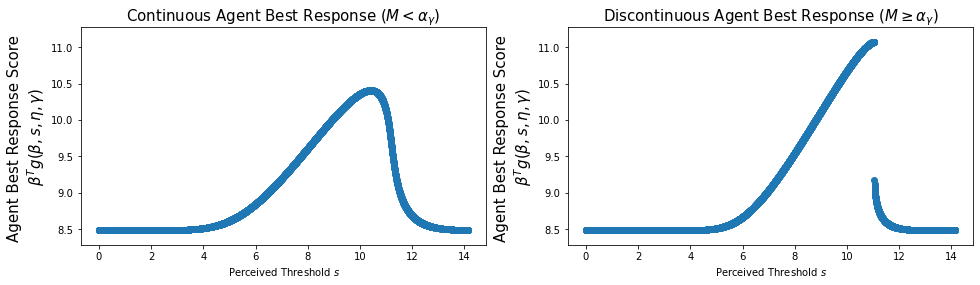

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].scatter(thresholds, scores_brs_cont)
ax[0].set_xlabel("Perceived Threshold " + r"$s$")
ax[0].set_ylabel("Agent Best Response Score \n" + r"$\beta^{T}g(\beta, s, \eta, \gamma)$", fontsize=15)
ax[0].set_title("Continuous Agent Best Response " + r"($M < \alpha_{\gamma}$)", fontsize=15)

ax[1].scatter(thresholds, scores_brs_discont)
ax[1].set_xlabel("Perceived Threshold " + r"$s$")
ax[1].set_ylabel("Agent Best Response Score \n" + r"$\beta^{T}g(\beta, s, \eta, \gamma)$", fontsize=15)
ax[1].set_title("Discontinuous Agent Best Response " + r"($M \geq \alpha_{\gamma}$)", fontsize=15)

all_scores = scores_brs_cont + scores_brs_discont

max_score = max(all_scores)+ 0.20
min_score = min(all_scores) - 0.20
ax[1].set_ylim(min_score , max_score )
ax[0].set_ylim(min_score , max_score )
plt.savefig("figs/paper_continuity.pdf")
